In [1]:
# Obtain Heat and Volume flux Time Series
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def Flux_TS_Sz(datapath, case_id, xidx):
    State01 = xr.open_dataset(datapath + '/state_' + str(format(case_id,'03d')) + '.nc')
    Adv01 = xr.open_dataset(datapath + '/Adv_' + str(format(case_id,'03d')) + '.nc')
    Grid01 = xr.open_dataset(datapath + '/grid_' + str(format(case_id,'03d')) + '.nc')
    
    State = State01.isel(T=~State01.get_index("T").duplicated())
    Adv = Adv01.isel(T=~Adv01.get_index("T").duplicated())
    
    state = State.isel(T=range(1,len(State.T)))
    areaW = Grid01.HFacW * Grid01.drF * Grid01.dyG # Z Y Xp1
    u = state.U.data
    
    time = Adv.T.data / 86400
    Cp = 3994  # Specific heat content J/kg/C
    rho = 999.8 # Density
    
    advp = np.zeros(len(time)) # Positive advective heat flux
    advn = np.zeros(len(time)) # Negative advective heat flux
    Qp = np.zeros(len(time)) # Positive diffusive heat flux
    Qn = np.zeros(len(time)) # Negative diffusive heat flux
    
    for t in range(len(time)):
        advx = Adv.ADVx_TH.data[t,:,:,xidx] * Cp * rho
        Qx = state.U.data[t,:,:,xidx] * areaW.data[:,:,xidx]
        
        advp[t] = advx[advx>0].sum()
        advn[t] = advx[advx<0].sum()
        
        Qp[t] = Qx[Qx>0].sum()
        Qn[t] = Qx[Qx<0].sum()
        
    #return time, advp, advn, Qp, Qn
    return Qn

In [7]:
path1 = '/work/oceans/wbao/MITgcm_results/iceplume/4_Sz_minhs'
path2 = '/work/oceans/wbao/MITgcm_results/iceplume/4_Sz_maxhs'

case = np.array([1,2,3,4])
f, s = 6, 120 # Indexes for Glacier front, Western sill edge

day0, day1, day2 = 7, 14, 21

# Lower-layer heat flux near the glacier front
Hs0_d0 = np.empty(len(case))
Hs0_d1 = np.empty(len(case))
Hs0_d2 = np.empty(len(case))

# Lower_layer volume flux near the glacier fron
Qs0_d0 = np.empty(len(case))
Qs0_d1 = np.empty(len(case))
Qs0_d2 = np.empty(len(case))

for i in range(len(case)):
    
    Qn = Flux_TS_Sz(path1, case[i], f)
    
#     Hs0_d0[i] = Hn[2*day0-1]
#     Hs0_d1[i] = Hn[2*day1-1]
#     Hs0_d2[i] = Hn[2*day2-1]
    
    Qs0_d0[i] = Qn[2*day0-1]
    Qs0_d1[i] = Qn[2*day1-1]
    Qs0_d2[i] = Qn[2*day2-1]

In [ ]:
dd1[19]

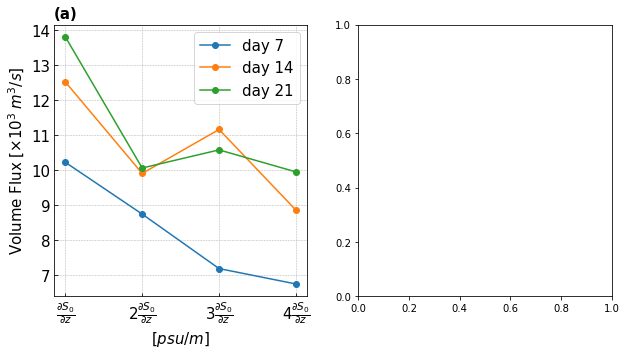

In [14]:
fig1 = plt.figure(figsize=(10,5))
fig1.tight_layout()


# Plot Hs vs. Sz
ax1 = fig1.add_subplot(121)
ax1.plot(case,-Qs0_d0/1e3,'o-',label=r'day 7')
ax1.plot(case,-Qs0_d1/1e3,'o-',label=r'day 14')
ax1.plot(case,-Qs0_d2/1e3,'o-',label=r'day 21')
ax1.legend(loc='best', fontsize=15)
ax1.grid(linestyle='--', linewidth=0.5)

ax1.set_xticks([1, 2, 3, 4])
ax1.set_xticklabels([r'$\frac{\partial S_0}{\partial z}$',r'$2\frac{\partial S_0}{\partial z}$',
                    r'$3\frac{\partial S_0}{\partial z}$',r'$4\frac{\partial S_0}{\partial z}$'])
#ax1.set_ylim([0, .7])
ax1.set_xlabel(r'[$psu/m$]', size=15)
ax1.set_ylabel(r'Volume Flux [$\times 10^3\;m^3/s$]', size=15)
ax1.set_title('(a)', loc='left', size=15, weight='bold')
ax1.tick_params(direction='in', labelsize=15)

# Plot Qs vs. Sz
ax2 = fig1.add_subplot(122)
# ax2.plot(case,-Qs0_d0/1e3,'o-',label=r'day 7')
# ax2.plot(case,-Qs0_d1/1e3,'o-',label=r'day 14')
# ax2.plot(case,-Qs0_d2/1e3,'o-',label=r'day 21')
# ax2.legend(loc='best', fontsize=15)
ax2.grid(linestyle='--', linewidth=0.5)

ax2.set_xticks([1, 2, 3, 4])
ax2.set_xticklabels([r'$\frac{\partial S_0}{\partial z}$',r'$2\frac{\partial S_0}{\partial z}$',
                    r'$3\frac{\partial S_0}{\partial z}$',r'$4\frac{\partial S_0}{\partial z}$'])
#ax1.set_ylim([0, .7])
ax2.set_xlabel(r'[$psu/m$]', size=15)
#ax2.set_ylabel(r'Volume Flux [$\times 10^3\;m^3/s$]', size=15)
ax2.set_title('(a)', loc='left', size=15, weight='bold')
ax2.tick_params(direction='in', labelsize=15)
